In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading surrey-audiovisual-expressed-emotion-savee.zip to .\surrey-audiovisual-expressed-emotion-savee


100%|██████████| 107M/107M [03:17<00:00, 570kB/s]  


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
folder_path="D:/speech_recognition/savee/surrey-audiovisual-expressed-emotion-savee/ALL/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]


for file in x:
    file_path.append(folder_path + file)
    y = file.split('_')[1]
    emo = y[-8:-6]
    if emo=='a':
        emotion.append('angry')
    elif emo=='d':
        emotion.append('disgust')
    elif emo=='f':
        emotion.append('fear')
    elif emo=='h':
        emotion.append('happy')
    elif emo=='n':
        emotion.append('neutral')
    elif emo=='sa':
        emotion.append('sad')
    else:
        emotion.append('surprise')
        

SAVEE_df = pd.DataFrame(emotion, columns=['emotion'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(file_path, columns=['path'])], axis=1)

In [11]:
SAVEE_df

,emotion,path
0,angry,D:/speech_recognition/savee/surrey-audiovisual...
1,angry,D:/speech_recognition/savee/surrey-audiovisual...
2,angry,D:/speech_recognition/savee/surrey-audiovisual...
3,angry,D:/speech_recognition/savee/surrey-audiovisual...
4,angry,D:/speech_recognition/savee/surrey-audiovisual...
...,...,...
475,surprise,D:/speech_recognition/savee/surrey-audiovisual...
476,surprise,D:/speech_recognition/savee/surrey-audiovisual...
477,surprise,D:/speech_recognition/savee/surrey-audiovisual...
478,surprise,D:/speech_recognition/savee/surrey-audiovisual...


<AxesSubplot: >

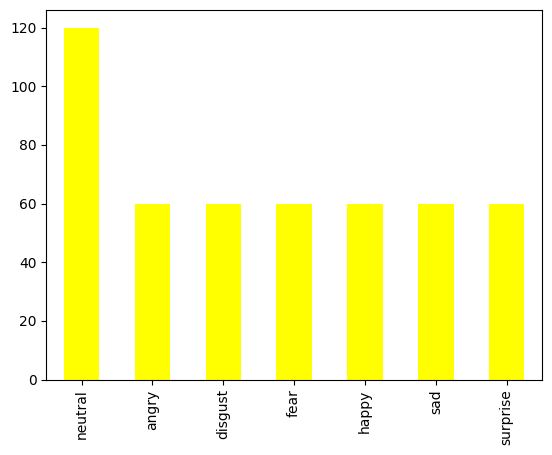

In [12]:
SAVEE_df.emotion.value_counts().plot(kind='bar', color='yellow')

In [13]:
import librosa

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [14]:
def extract_features(data,sample_rate):
    
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate )
    result = np.vstack((result, res2)) 
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

In [15]:
X, Y = [], []
for path, emotion in zip(SAVEE_df.path, SAVEE_df.emotion):
    features = get_features(path)
    for i in features:
        X.append(i)
        Y.append(emotion)

C:\Users\Manav\AppData\Local\Temp\ipykernel_12892\1313063952.py:9: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\Manav\AppData\Local\Temp\ipykernel_12892\1313063952.py:16: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
C:\Users\Manav\AppData\Local\Temp\ipykernel_12892\1313063952.py:9: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\Manav\AppData\Local\Temp\ipykernel_12892\1313063952.py:16: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pit

In [32]:
import librosa.display
from IPython.display import Audio
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

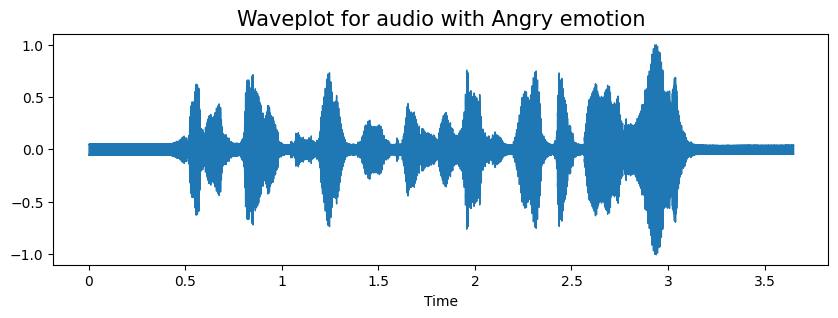

In [33]:
emotion='Angry'
path = 'D:/speech_recognition/savee/surrey-audiovisual-expressed-emotion-savee/ALL/DC_a01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

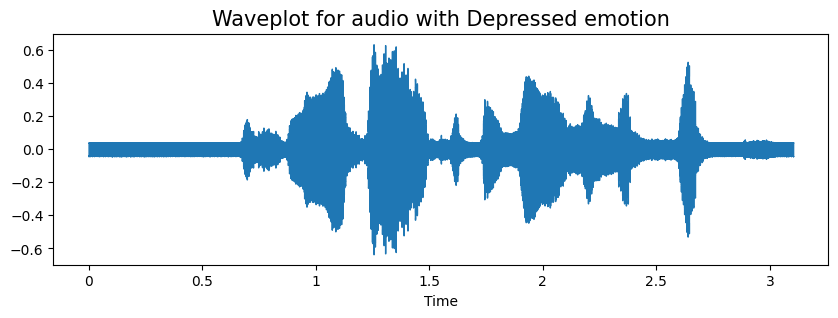

In [35]:
emotion='Depressed'
path = 'D:\speech_recognition\savee\surrey-audiovisual-expressed-emotion-savee\ALL\DC_d05.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [16]:
SAVEE_df = pd.DataFrame(X)
SAVEE_df['emotion'] = Y
SAVEE_df.to_csv('features.csv', index=False)
SAVEE_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,emotion
0,0.038891,0.470774,0.580054,0.556175,0.485266,0.460437,0.484227,0.506239,0.460555,0.536101,...,8.040205e-06,2.192379e-06,1.331432e-06,1.170415e-06,1.059650e-06,8.348291e-07,4.372123e-07,1.530506e-07,5.519172e-08,angry
1,0.115284,0.580428,0.687952,0.701013,0.649925,0.622199,0.609736,0.591914,0.576325,0.606631,...,6.244252e-02,6.520432e-02,6.574920e-02,6.604820e-02,6.360711e-02,6.511534e-02,6.479497e-02,6.246835e-02,6.481671e-02,angry
2,0.036068,0.337897,0.434097,0.576743,0.553285,0.446121,0.431649,0.449895,0.458030,0.448255,...,1.290034e-05,4.903723e-06,1.640305e-06,1.014612e-06,8.838114e-07,7.072085e-07,4.771167e-07,3.160687e-07,2.672723e-07,angry
3,0.033904,0.662632,0.704404,0.622993,0.550236,0.483400,0.450052,0.422976,0.463144,0.555220,...,9.499592e-05,8.820895e-05,7.889584e-05,7.396754e-05,6.454494e-05,4.986126e-05,2.608372e-05,8.606809e-06,2.192711e-06,angry
4,0.125986,0.728511,0.804761,0.757096,0.696091,0.614778,0.534111,0.521560,0.554735,0.653700,...,7.381833e-02,7.486445e-02,7.091044e-02,6.924828e-02,7.698727e-02,7.569461e-02,7.640355e-02,7.113751e-02,7.113293e-02,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.256899,0.720118,0.735846,0.738513,0.714023,0.735329,0.677213,0.641198,0.650942,0.645038,...,5.649424e-04,5.692425e-04,5.795829e-04,5.599904e-04,5.454544e-04,5.499145e-04,5.371254e-04,5.754321e-04,5.694083e-04,surprise
1436,0.045830,0.508613,0.574411,0.589937,0.565149,0.508394,0.532448,0.543339,0.516656,0.543557,...,1.824383e-07,6.677096e-08,4.835042e-08,3.871718e-08,3.323877e-08,2.722083e-08,1.436905e-08,6.949060e-09,5.050349e-09,surprise
1437,0.042526,0.603875,0.563046,0.559025,0.539222,0.574622,0.614927,0.654881,0.624225,0.590965,...,6.467074e-08,2.076177e-08,1.028410e-08,8.832544e-09,7.857002e-09,5.115117e-09,1.711258e-09,2.714505e-10,9.340081e-11,surprise
1438,0.045451,0.631743,0.609147,0.615629,0.594884,0.629427,0.639477,0.666525,0.634640,0.597558,...,2.187454e-06,2.117510e-06,2.131092e-06,2.091582e-06,2.132561e-06,2.009686e-06,2.078574e-06,2.145543e-06,2.154507e-06,surprise


In [19]:
from sklearn.model_selection import train_test_split
X = SAVEE_df.drop(['emotion'], axis=1)
feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(SAVEE_df.emotion.values))
index = {}
val = {}
for i, j in enumerate(labels):
    index[j] = i
    val[i] = j
y = np.array([index[x] for x in SAVEE_df.emotion.values])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svclassifier = SVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 44.44444444444444


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


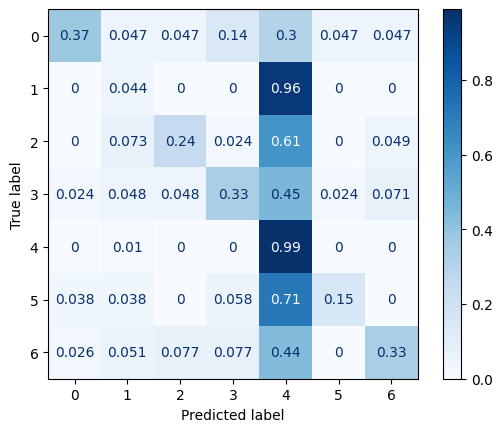

In [21]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(svclassifier,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 56.94444444444444


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


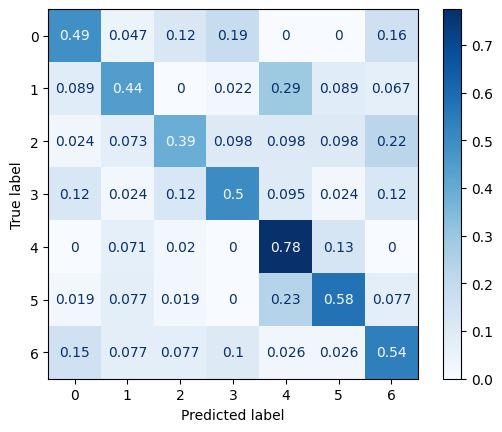

In [23]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(decision_tree,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

In [36]:
import keras
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical 

In [37]:
X = SAVEE_df.iloc[: ,:-1].values
Y = SAVEE_df['emotion'].values

In [38]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162), (1080, 7), (360, 162), (360, 7))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162), (1080, 7), (360, 162), (360, 7))

In [41]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162, 1), (1080, 7), (360, 162, 1), (360, 7))

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(loss = tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"), tf.keras.metrics.BinaryAccuracy(name="accuracy")], optimizer = tf.keras.optimizers.Adam(1e-4))

In [43]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='max', verbose=1)
history= model.fit(x_train, y_train, epochs = 20, batch_size = 32, callbacks=[callback])

Epoch 1/20
33/34 [============================>.] - ETA: 0s - loss: 0.1324 - rmse: 0.3639 - accuracy: 0.8571
Epoch 1: saving model to best_model.h5
34/34 [==============================] - 11s 56ms/step - loss: 0.1323 - rmse: 0.3637 - accuracy: 0.8571
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.1238 - rmse: 0.3519 - accuracy: 0.8571
Epoch 2: saving model to best_model.h5
34/34 [==============================] - 1s 43ms/step - loss: 0.1238 - rmse: 0.3519 - accuracy: 0.8571
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.1232 - rmse: 0.3510 - accuracy: 0.8571
Epoch 3: saving model to best_model.h5
34/34 [==============================] - 1s 43ms/step - loss: 0.1232 - rmse: 0.3510 - accuracy: 0.8571
Epoch 4/20
33/34 [============================>.] - ETA: 0s - loss: 0.1231 - rmse: 0.3508 - accuracy: 0.8571
Epoch 4: saving model to best_model.h5
34/34 [==============================] - 1s 43ms/step - loss: 0.1231 - rmse: 0.3508 - accuracy: 0.

In [44]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

12/12 [==============================] - 2s 22ms/step - loss: 0.1225 - rmse: 0.3500 - accuracy: 0.8571
Test Loss: 0.12247065454721451
Test accuracy: 34.99580919742584 %


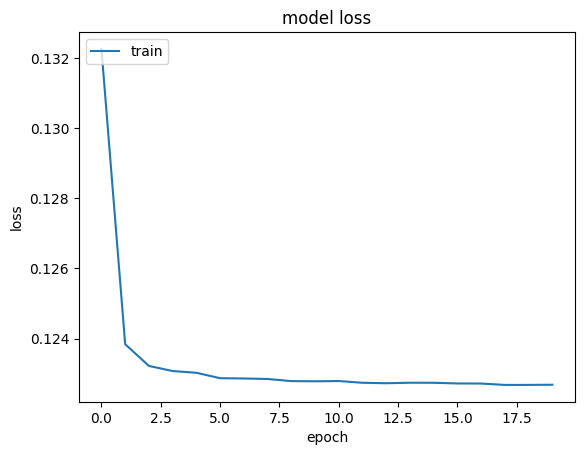

In [45]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

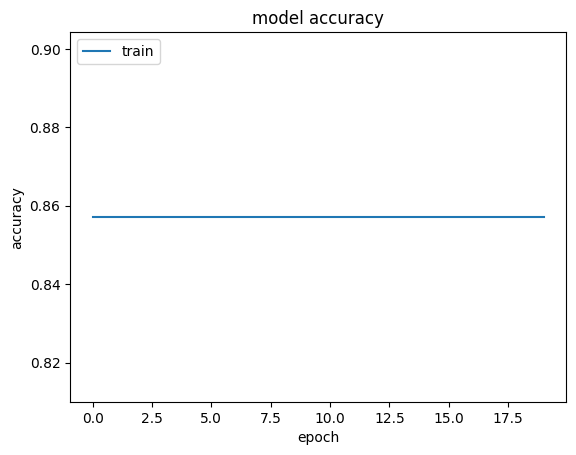

In [46]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()